In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [112]:
df = pd.read_csv("/content/nifty50 data.csv")

In [113]:
df.dropna(inplace = True)

In [114]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,10895.799805,10895.799805,10782.599609,10862.599609,506600.0
1,10815.400391,11018.549805,10813.799805,10948.250000,517900.0
2,10958.099609,10975.650391,10835.900391,10855.500000,548500.0
3,10899.200195,11058.049805,10842.950195,11032.450195,482500.0
4,11087.900391,11181.450195,11062.799805,11109.650391,538100.0


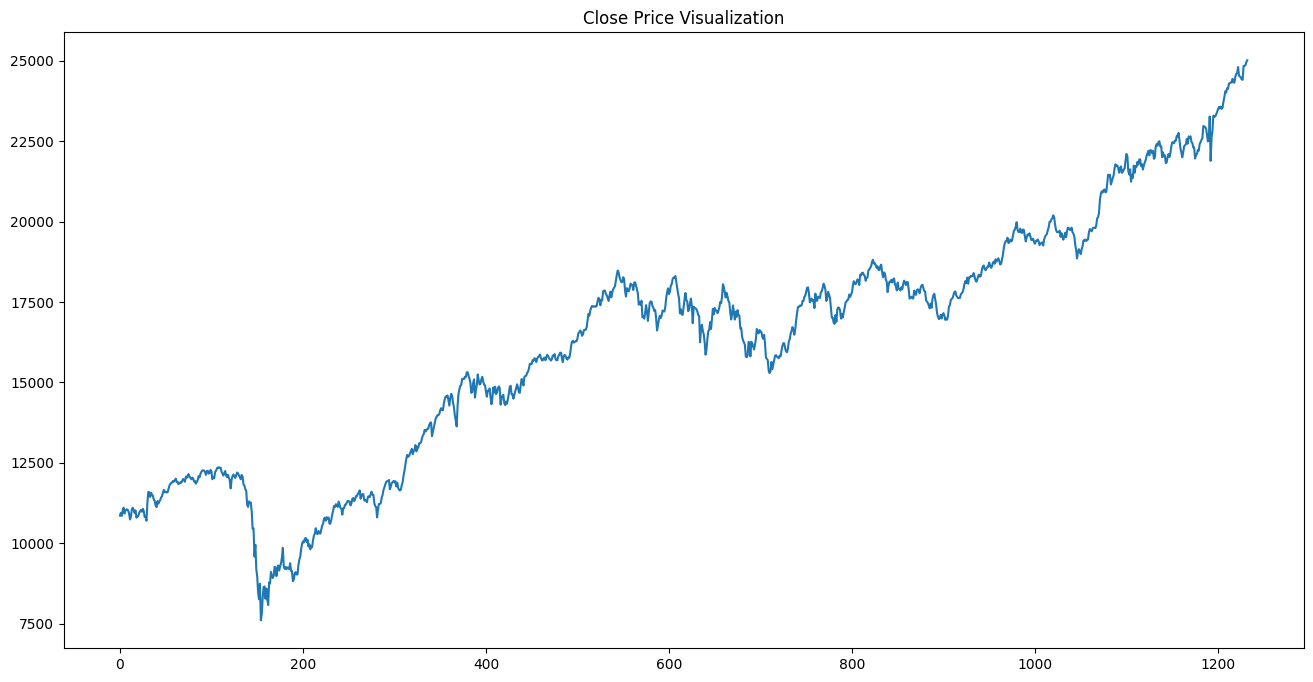

In [115]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [116]:
moving_100 = df['Close'].rolling(100).mean()

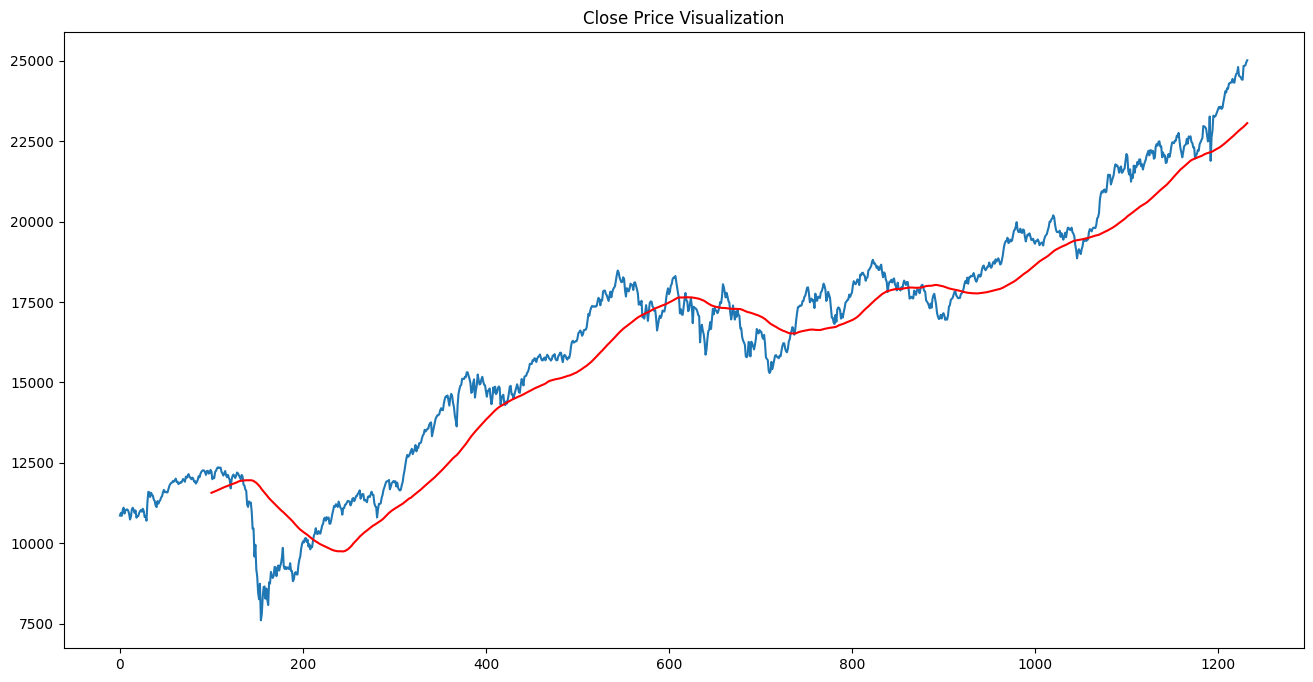

In [117]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df['Close'])
plt.plot(moving_100, 'r')

In [118]:
train = df[0:int(len(df)*0.70)]
test = df[int(len(df)*0.70): int(len(df))]

print(train.shape)
print(test.shape)

(861, 5)
(370, 5)


In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [120]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [121]:
data_training_array = scaler.fit_transform(train_close)

In [122]:
x_train = []
y_train = []
time_steps = 100

In [123]:
for i in range(time_steps, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [124]:
# x_test = []
# y_test = []
# for i in range(time_steps, data_test_array.shape[0]):
#     x_test.append(data_test_array[i-100: i])
#     y_test.append(data_test_array[i, 0])

# x_test, y_test = np.array(x_test), np.array(y_test)

In [125]:
x_train.shape

(761, 100, 1)

In [126]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
print("NaN in train_scaled:", np.isnan(x_train).sum())
print("Infinite in train_scaled:", np.isinf(x_train).sum())
# print("NaN in test_scaled:", np.isnan(x_test).sum())
# print("Infinite in test_scaled:", np.isinf(x_test).sum())

NaN in train_scaled: 0
Infinite in train_scaled: 0


In [128]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['MAE'])

In [129]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

In [130]:
model.fit(x_train, y_train, epochs=30, batch_size=32) #, callbacks=[early_stopping, lr_scheduler]

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - MAE: 0.1755 - loss: 0.0475
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - MAE: 0.0884 - loss: 0.0130
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - MAE: 0.0716 - loss: 0.0098
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - MAE: 0.0639 - loss: 0.0088
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - MAE: 0.0663 - loss: 0.0105
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - MAE: 0.0732 - loss: 0.0124
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - MAE: 0.0635 - loss: 0.0093
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - MAE: 0.0678 - loss: 0.0107
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - MAE: 0.0610 - loss: 0.0081
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - MAE: 0.0595 - loss: 0.0101
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - MAE: 0.0631 - loss: 0.0098
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - MAE: 0.0591 - loss: 0.0082
Epoch 13/30
24/24 ━━━━━━━━━━━━━━━━━

In [131]:
import tensorflow as tf
tf.keras.models.save_model(model, 'my_model.keras')

In [132]:
past_100_days = train_close[-100:]

In [133]:
final_df = pd.concat([pd.DataFrame(past_100_days), pd.DataFrame(test_close)], ignore_index=True)

In [134]:
input_data = scaler.fit_transform(final_df)
x_final_test = [input_data[i-100:i] for i in range(100, input_data.shape[0])]
x_final_test = np.array(x_final_test)

In [135]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [136]:
y_pred = model.predict(x_final_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step


In [137]:
scaler.scale_

array([9.93936984e-07])

In [138]:
scale_factor = 1/9.93936984e-07
y_pred = y_pred * scale_factor
y_test = np.array(y_test) * scale_factor

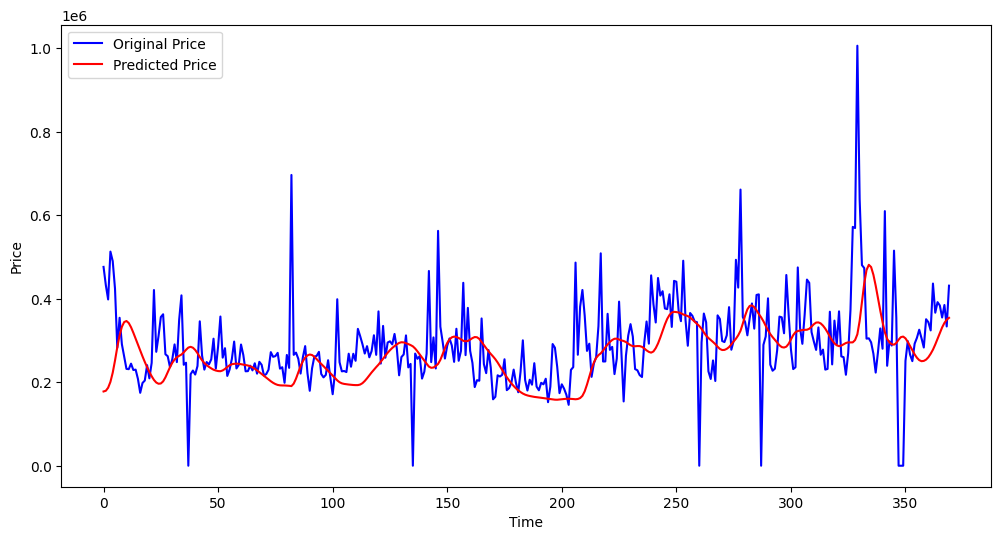

In [139]:
y_pred = y_pred.reshape(-1)
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  71091.23297859414
